# 加载包

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt


# 加载数据

In [3]:
data = pd.read_csv('.\input\creditcard.csv')
data.head()

FileNotFoundError: File b'.\\input\\creditcard.csv' does not exist

In [3]:
np.sum(data.values[0,1:29])

3.081756797503651

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 对数据进行分析

## 观察数据总共有多少类别
正负样本的比例

In [5]:
count_classes = pd.value_counts(data['Class'])
count_classes

0    284315
1       492
Name: Class, dtype: int64

Text(0,0.5,'个数')

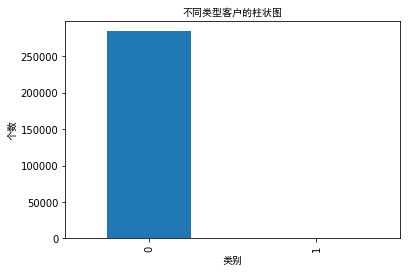

In [6]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
# 用pandas绘制简单的图形
count_classes.plot(kind='bar')
# 可以直接指定字体
plt.title('不同类型客户的柱状图',fontproperties='simHei')
plt.xlabel('类别',fontproperties='simHei')
plt.ylabel('个数',fontproperties='simHei')

可以看出样本是非常不均衡的，应对的办法有：下采样和过采样，同时特征Amount与v1~v28的数值范围相差较多

## 标准化

In [7]:
from sklearn.preprocessing import StandardScaler

# np.array(data['Amount']).reshape(-1,1)转换为列向量，-1：自动计算
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1,1))

In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,normAmount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,2.848070e+05
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727,3.202236e-16
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,1.000002e+00
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,-3.532294e-01
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,-3.308401e-01
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,-2.652715e-01
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,-4.471707e-02
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,1.023622e+02


In [10]:
# 去除无用的Time、Amount等特征,axis=1删除列
data = data.drop(['Time','Amount'],axis=1)
# data = data.drop(columns=['Time','Amount'])
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## 构造样本数据集
### 下采样
根据数量较少类别的样本数量来进行采样

In [11]:
X = data.loc[:,data.columns != 'Class']
y = data.loc[:,data.columns == 'Class'] # 返回值的类型为 pandas.core.frame.DataFrame
# y = data.loc[:,'Class'] # 返回值的类型为 pandas.core.series.Series,会造成后面的错误 errorno=100


# 欺诈信用卡的样本数量及索引
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)
# 正常信用卡的记录索引
normal_indices = data[data.Class == 0].index

#随机选取
random_normal_indices = np.random.choice(normal_indices,number_records_fraud,replace=False)
### 上
# 下采样
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_data = data.iloc[under_sample_indices,:]
X_under_sample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_under_sample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

# 
print("正常样本的比例：",len(under_sample_data[under_sample_data.Class == 0]) / len(under_sample_data) )
print("欺诈样本的比例：",len(under_sample_data[under_sample_data.Class != 0]) / len(under_sample_data) )
print('样本的总数量：',len(under_sample_data) )
type(X),type(y),type(X_under_sample),type(y_under_sample)

正常样本的比例： 0.5
欺诈样本的比例： 0.5
样本的总数量： 984


(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

### 过采样-SMOTE样本生成策略
对少数类的样本进行扩充

In [24]:
import imblearn # 不平衡数据的处理包imblearn

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

oversample = SMOTE(random_state=0)
X_over_sample, y_over_sample = oversample.fit_sample(X_train,y_train.values.ravel())
# y_train[y_train.Class == 1].shape,y_train[y_train.Class == 0].shape
# os_y[os_y == 1].shape,os_y[os_y == 0].shape

## 构造测试集和训练集

In [60]:
from sklearn.model_selection  import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((199364, 29), (85443, 29), (199364, 1), (85443, 1))

In [61]:
# 下采样样本
X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample = train_test_split(X_under_sample,
                                                                                                 y_under_sample,
                                                                                                 test_size=0.3,
                                                                                                 random_state = 0)
# 过采样样本
X_train_oversample,X_test_oversample,y_train_oversample,y_test_oversample = train_test_split(X_over_sample,
                                                                                                 y_over_sample,
                                                                                                 test_size=0.3,
                                                                                                 random_state = 0)

## 构造逻辑回归模型
### 引用模块

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report

### 定义k折交叉验证的结果函数

In [15]:
def print_Kfold_scores(x_train,y_train,kfold_num):
    # 交叉验证算子
    fold = KFold(n_splits=kfold_num,shuffle=False,random_state=0)
    
    # 正则化惩罚项
    c_param_range  = [0.01, 0.1, 1, 10, 100]
    
    # 建立保存结果的表格
    results_table = pd.DataFrame(index=range(len(c_param_range),2),columns=['C_parameter','Mean recall scores'])
    results_table['C_parameter'] = c_param_range
    
    j = 0
    for c_param in c_param_range:
        print('-'*40)
        print('C_parameter:',c_param)
        print('-'*40)
        print()
        
        recall_accs = []
        # fold.split(x_train)将数据切分为两部分，0部分为大头，1部分为小头
        for iteration,indices in enumerate(fold.split(x_train),start=1):
            print(indices[0].shape,indices[1].shape)
            lr = LogisticRegression(C=c_param,penalty='l1')
            
            lr.fit(x_train.iloc[indices[0],:] , y_train.iloc[indices[0],:].values.ravel()  )
            
            y_pred_undersample = lr.predict(x_train.iloc[indices[1],:])
            
            recall_acc = recall_score(y_train.iloc[indices[1],:],y_pred_undersample.ravel())
            recall_accs.append(recall_acc)
            print('迭代次数:',iteration, 'recall score = ', recall_acc)
            pass
        results_table.loc[j,'Mean recall scores'] = np.mean(recall_accs)
        j +=1
        print('平均召回率 = ',np.mean(recall_accs))
        pass
    # results_table['Mean recall scores']的数据类型为object，必须转换为float才可以进行max操作
    # idxmax 获取最大值的索引
    results_table['Mean recall scores'] = results_table['Mean recall scores'].astype(float)
    best_c = results_table.loc[ results_table['Mean recall scores'].idxmax(),
                                 'C_parameter']
    print('*'*50)
    print('Best C parameter = ',best_c)
    print('*'*50)
    
    return best_c

In [16]:
# errorno=100， IndexingError: Too many indexers
best_c = print_Kfold_scores(X_train_undersample,y_train_undersample,10)

----------------------------------------
C_parameter: 0.01
----------------------------------------

(619,) (69,)
迭代次数: 1 recall score =  0.9487179487179487
(619,) (69,)
迭代次数: 2 recall score =  0.8823529411764706
(619,) (69,)
迭代次数: 3 recall score =  0.9487179487179487
(619,) (69,)
迭代次数: 4 recall score =  0.8529411764705882
(619,) (69,)
迭代次数: 5 recall score =  1.0
(619,) (69,)
迭代次数: 6 recall score =  1.0
(619,) (69,)
迭代次数: 7 recall score =  1.0
(619,) (69,)
迭代次数: 8 recall score =  0.9285714285714286
(620,) (68,)
迭代次数: 9 recall score =  0.918918918918919
(620,) (68,)
迭代次数: 10 recall score =  1.0
平均召回率 =  0.9480220362573304
----------------------------------------
C_parameter: 0.1
----------------------------------------

(619,) (69,)
迭代次数: 1 recall score =  0.8717948717948718
(619,) (69,)
迭代次数: 2 recall score =  0.7941176470588235
(619,) (69,)
迭代次数: 3 recall score =  0.8717948717948718
(619,) (69,)
迭代次数: 4 recall score =  0.8529411764705882
(619,) (69,)
迭代次数: 5 recall score =  0.89285714

### 混淆矩阵
Recall = TP / (TP + FN)

In [17]:
import itertools
def plot_confusion_matrix(confusion_matrix,classes,title='混淆矩阵',cmap=plt.cm.Blues):
    plt.imshow(confusion_matrix,interpolation='nearest',cmap=cmap)
    plt.title(title,fontproperties="SimHei")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    
    thresh = confusion_matrix.max() /2
    for i, j in itertools.product(range(confusion_matrix.shape[0]),
                                  range(confusion_matrix.shape[1])):
        plt.text(j, i, confusion_matrix[i,j],
                horizontalalignment = 'center',
                color = 'white' if confusion_matrix[i,j] > thresh else 'black')
    plt.tight_layout()    
    plt.xlabel('预测的标签',fontproperties="SimHei")
    plt.ylabel('真实的标签',fontproperties="SimHei")
    return

#### 使用过采样数据进行测试

Recall metric in the testing dataset:  0.9146577719378043


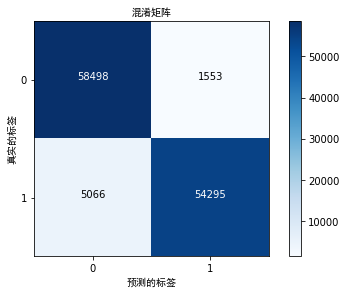

In [63]:
lr = LogisticRegression(C = best_c,penalty='l1')
lr.fit(X_train_oversample,y_train_oversample)
y_pred_oversample = lr.predict(X_test_oversample)

#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
#  y = column_or_1d(y, warn=True) 

cm_matrix = confusion_matrix(y_test_oversample,
                             y_pred_oversample)
classes_names = [0,1]

print("Recall metric in the testing dataset: ", cm_matrix[1,1]/(cm_matrix[1,0] + cm_matrix[1,1]))

plot_confusion_matrix(cm_matrix,classes=classes_names)

#### 使用下采样数据进行测试

Recall metric in the testing dataset:  0.9523809523809523


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


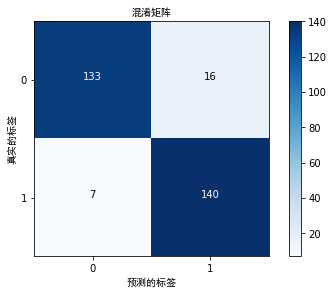

In [18]:
lr = LogisticRegression(C = best_c,penalty='l1')
lr.fit(X_train_undersample,y_train_undersample)
y_pred_undersample = lr.predict(X_test_undersample)

#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
#  y = column_or_1d(y, warn=True) 

cm_matrix = confusion_matrix(y_test_undersample.values.ravel(),
                             y_pred_undersample)
classes_names = [0,1]

print("Recall metric in the testing dataset: ", cm_matrix[1,1]/(cm_matrix[1,0] + cm_matrix[1,1]))

plot_confusion_matrix(cm_matrix,classes=classes_names)
# y_test_undersample.values.ravel().shape,y_pred_undersample.shape,X_test_undersample.shape

#### 使用全部测试数据进行测试
看以看出，存在9666个信用卡被误判为欺诈信用卡

Recall metric in the testing dataset:  0.9387755102040817


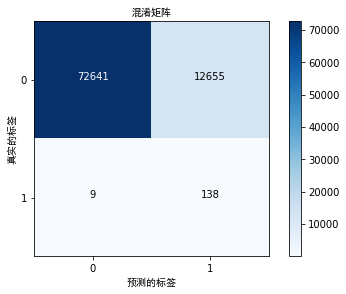

In [19]:
lr = LogisticRegression(C = best_c,penalty='l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test)

cm_matrix = confusion_matrix(y_test,
                             y_pred)
classes_names = [0,1]

print("Recall metric in the testing dataset: ", cm_matrix[1,1]/(cm_matrix[1,0] + cm_matrix[1,1]))

plot_confusion_matrix(cm_matrix,classes=classes_names)

#### 使用数据直接进行训练

Recall metric in the testing dataset:  0.5510204081632653


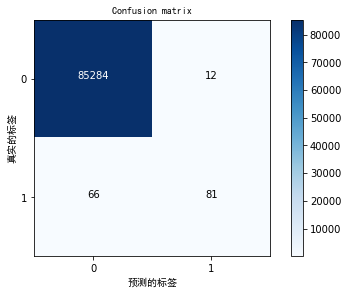

In [20]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

#### ！！通过阈值进行控制
通过调整阈值，降低正常信用卡被误判为欺诈信用卡的比例
阈值提高，recall值会下降

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9795918367346939
Recall metric in the testing dataset:  0.9523809523809523
Recall metric in the testing dataset:  0.891156462585034
Recall metric in the testing dataset:  0.8367346938775511
Recall metric in the testing dataset:  0.7482993197278912
Recall metric in the testing dataset:  0.5918367346938775


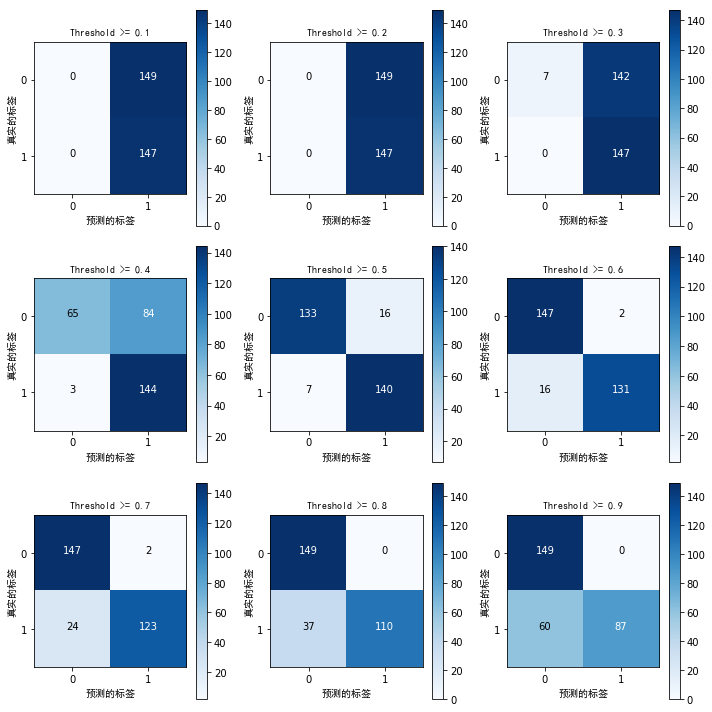

In [21]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

通过调整阈值，降低正常信用卡被误判为欺诈信用卡的比例

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.9659863945578231
Recall metric in the testing dataset:  0.9387755102040817
Recall metric in the testing dataset:  0.8775510204081632
Recall metric in the testing dataset:  0.8299319727891157
Recall metric in the testing dataset:  0.7687074829931972
Recall metric in the testing dataset:  0.5850340136054422


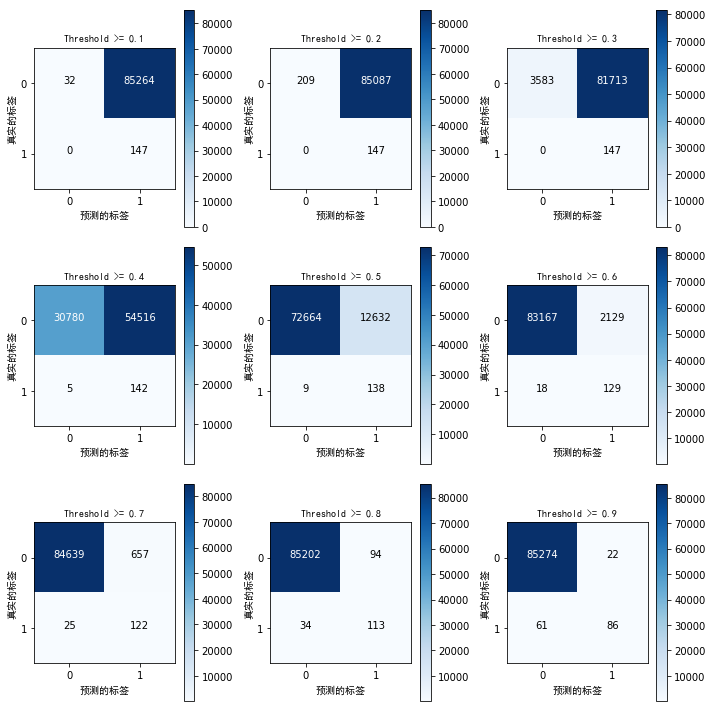

In [22]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_proba = lr.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 